In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# 펭귄 데이터

In [2]:
train = pd.read_csv('./train.csv')
train 

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
0,0,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,50.0,15.3,220,MALE,8.30515,-25.19017,5550
1,1,Chinstrap penguin (Pygoscelis antarctica),Dream,No,49.5,19.0,200,MALE,9.63074,-24.34684,3800
2,2,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,45.1,14.4,210,FEMALE,8.51951,-27.01854,4400
3,3,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,44.5,14.7,214,FEMALE,8.20106,-26.16524,4850
4,4,Gentoo penguin (Pygoscelis papua),Biscoe,No,49.6,16.0,225,MALE,8.38324,-26.84272,5700
...,...,...,...,...,...,...,...,...,...,...,...
109,109,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,36.6,17.8,185,FEMALE,NaN,NaN,3700
110,110,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,39.2,18.6,190,MALE,9.11006,-25.79549,4250
111,111,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,43.2,18.5,192,MALE,8.97025,-26.03679,4100
112,112,Chinstrap penguin (Pygoscelis antarctica),Dream,No,46.9,16.6,192,FEMALE,9.80589,-24.73735,2700


id : 샘플 아이디

Species: 펭귄의 종을 나타내는 문자열

Island : 샘플들이 수집된 Palmer Station 근처 섬 이름

Clutch Completion : 관찰된 펭귄 둥지의 알이 2개인 경우 Full Clutch이며 Yes로 표기

Culmen Length (mm) : 펭귄 옆모습 기준 부리의 가로 길이

Culmen Depth (mm) : 펭귄 옆모습 기준 부리의 세로 길이

Flipper Length (mm) : 펭귄의 팔(날개) 길이

Sex : 펭귄의 성별

Delta 15 N (o/oo)  : 토양에 따라 변화하는 안정 동위원소 15N:14N의 비율

Delta 13 C (o/oo) : 먹이에 따라 변화하는 안정 동위원소 13C:12C의 비율

Body Mass (g): 펭귄의 몸무게를 나타내는 숫자 (g)

In [3]:
train = train.drop('id', axis = 1)
train

,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
0,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,50.0,15.3,220,MALE,8.30515,-25.19017,5550
1,Chinstrap penguin (Pygoscelis antarctica),Dream,No,49.5,19.0,200,MALE,9.63074,-24.34684,3800
2,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,45.1,14.4,210,FEMALE,8.51951,-27.01854,4400
3,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,44.5,14.7,214,FEMALE,8.20106,-26.16524,4850
4,Gentoo penguin (Pygoscelis papua),Biscoe,No,49.6,16.0,225,MALE,8.38324,-26.84272,5700
...,...,...,...,...,...,...,...,...,...,...
109,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,36.6,17.8,185,FEMALE,NaN,NaN,3700
110,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,39.2,18.6,190,MALE,9.11006,-25.79549,4250
111,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,43.2,18.5,192,MALE,8.97025,-26.03679,4100
112,Chinstrap penguin (Pygoscelis antarctica),Dream,No,46.9,16.6,192,FEMALE,9.80589,-24.73735,2700


In [4]:
train.shape

(114, 10)

In [5]:
train.dtypes

Species                 object
Island                  object
Clutch Completion       object
Culmen Length (mm)     float64
Culmen Depth (mm)      float64
Flipper Length (mm)      int64
Sex                     object
Delta 15 N (o/oo)      float64
Delta 13 C (o/oo)      float64
Body Mass (g)            int64
dtype: object

In [6]:
categorical_columns = ['Species','Island','Clutch Completion', 'Sex']
numerical_columns = ['Culmen Length (mm)','Culmen Depth (mm)','Flipper Length (mm)','Delta 15 N (o/oo)','Delta 13 C (o/oo)']

In [7]:
train.describe()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
count,114.000000,114.000000,114.000000,111.000000,111.000000,114.000000
mean,44.613158,17.014912,203.052632,8.737634,-25.723051,4327.850877
std,5.321829,1.941363,14.653425,0.567698,0.859786,781.766484
min,33.500000,13.200000,174.000000,7.632200,-27.018540,2700.000000
25%,40.325000,15.225000,190.000000,8.272585,-26.434025,3675.000000
50%,45.200000,17.250000,199.000000,8.632590,-25.955410,4250.000000
75%,49.075000,18.600000,216.000000,9.264635,-25.005945,4850.000000
max,55.100000,21.100000,231.000000,10.025440,-24.102550,6300.000000


In [8]:
train.isnull().sum()

Species                0
Island                 0
Clutch Completion      0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Sex                    3
Delta 15 N (o/oo)      3
Delta 13 C (o/oo)      3
Body Mass (g)          0
dtype: int64

In [9]:
train.corr()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
Culmen Length (mm),1.000000,-0.251255,0.672205,-0.040205,0.114983,0.572063
Culmen Depth (mm),-0.251255,1.000000,-0.603341,0.650629,0.477688,-0.490643
Flipper Length (mm),0.672205,-0.603341,1.000000,-0.533212,-0.454315,0.864814
Delta 15 N (o/oo),-0.040205,0.650629,-0.533212,1.000000,0.641107,-0.548678
Delta 13 C (o/oo),0.114983,0.477688,-0.454315,0.641107,1.000000,-0.468425
Body Mass (g),0.572063,-0.490643,0.864814,-0.548678,-0.468425,1.000000


### 전체데이터 분포살펴보기

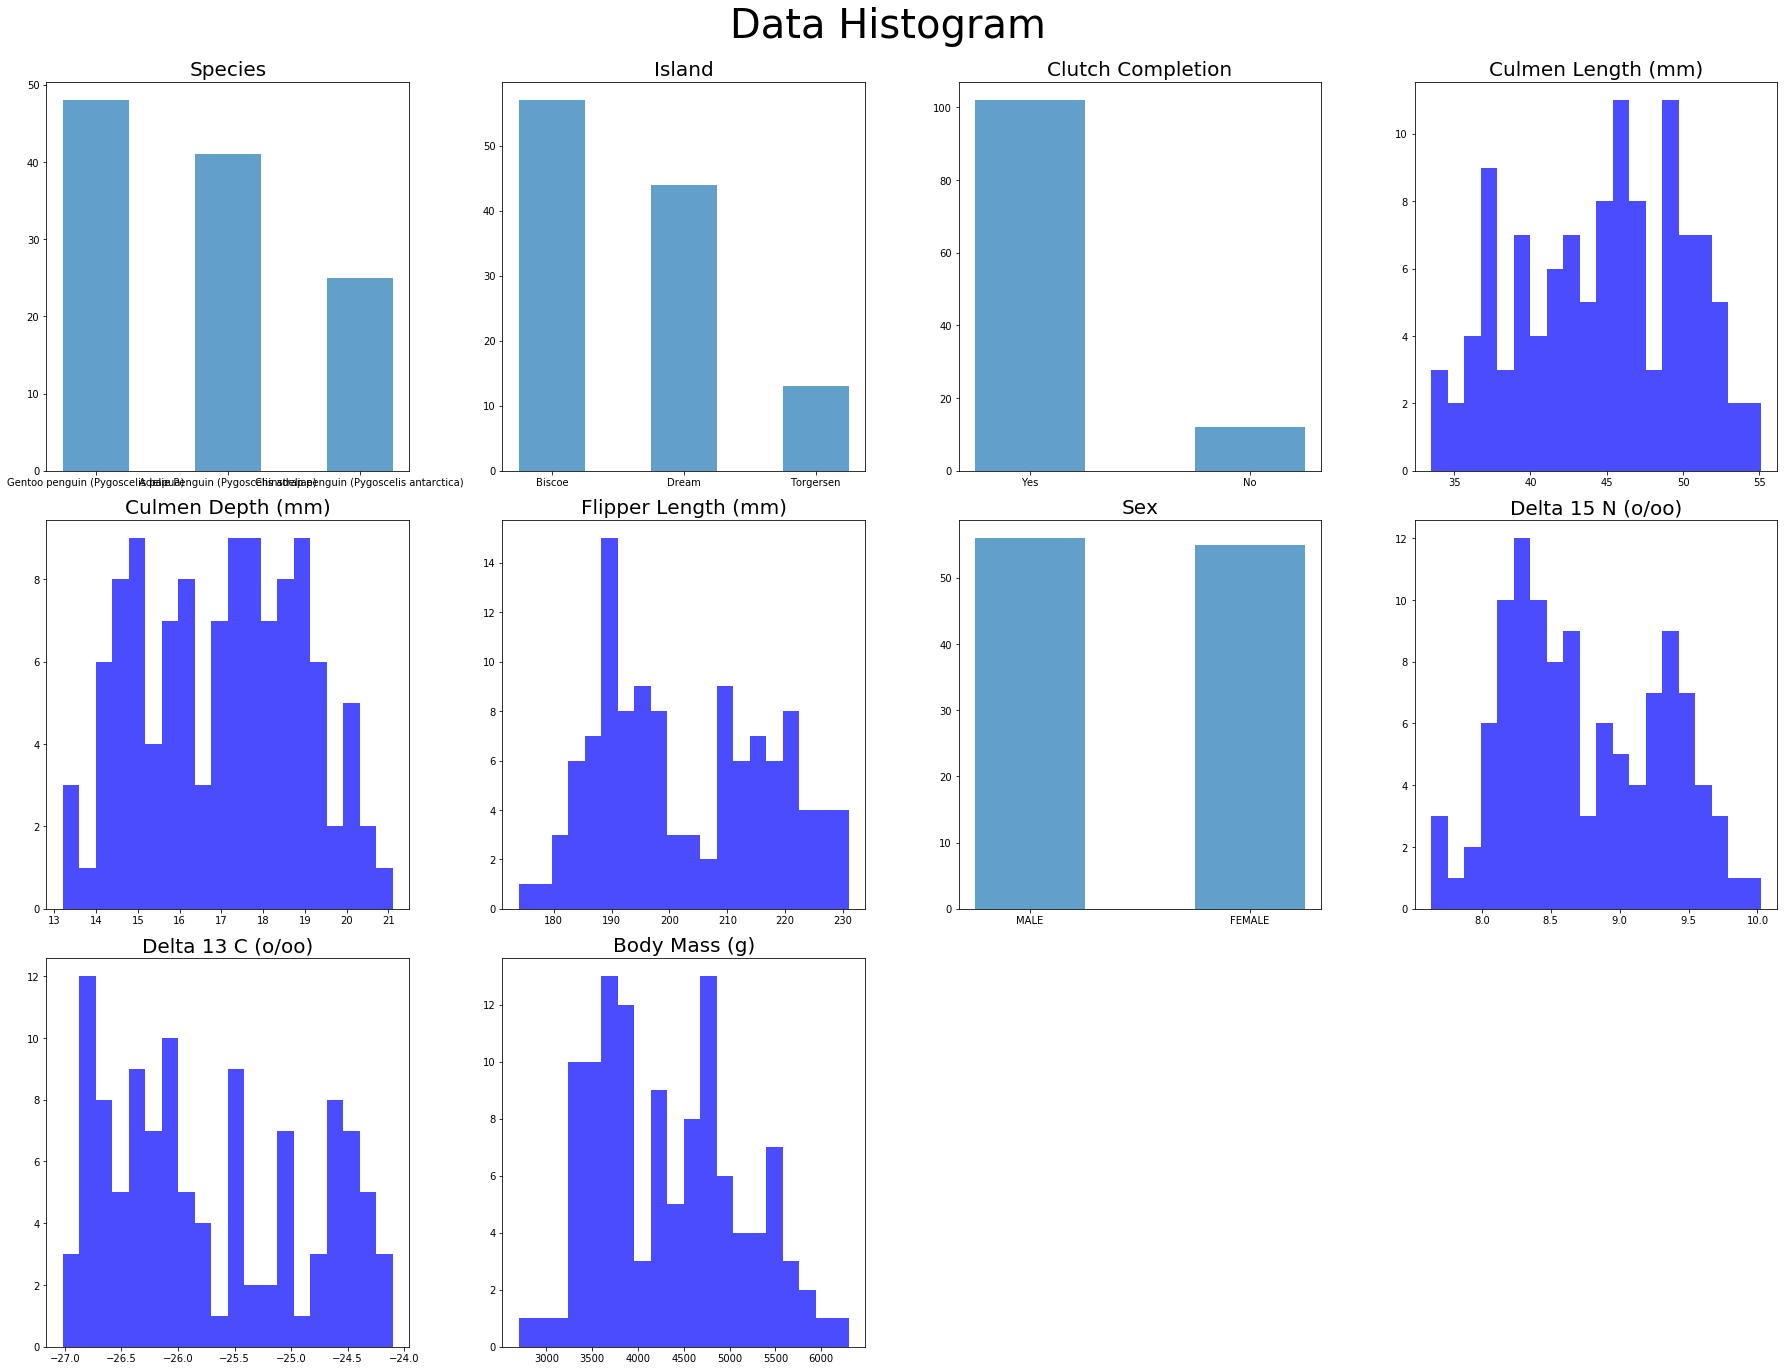

In [10]:
plt.figure(figsize=(25,20))
plt.suptitle("Data Histogram", fontsize=40)
cols = train.columns
for i in range(len(cols)):
    plt.subplot(3,4,i+1)
    plt.title(cols[i], fontsize=20)
    if len(train[cols[i]].unique()) > 20:
        plt.hist(train[cols[i]], bins=20, color='b', alpha=0.7)
    else:
        temp = train[cols[i]].value_counts()
        plt.bar(temp.keys(), temp.values, width=0.5, alpha=0.7)
        plt.xticks(temp.keys())
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### 연속형 변수와 목표변수의 ScatterPlot

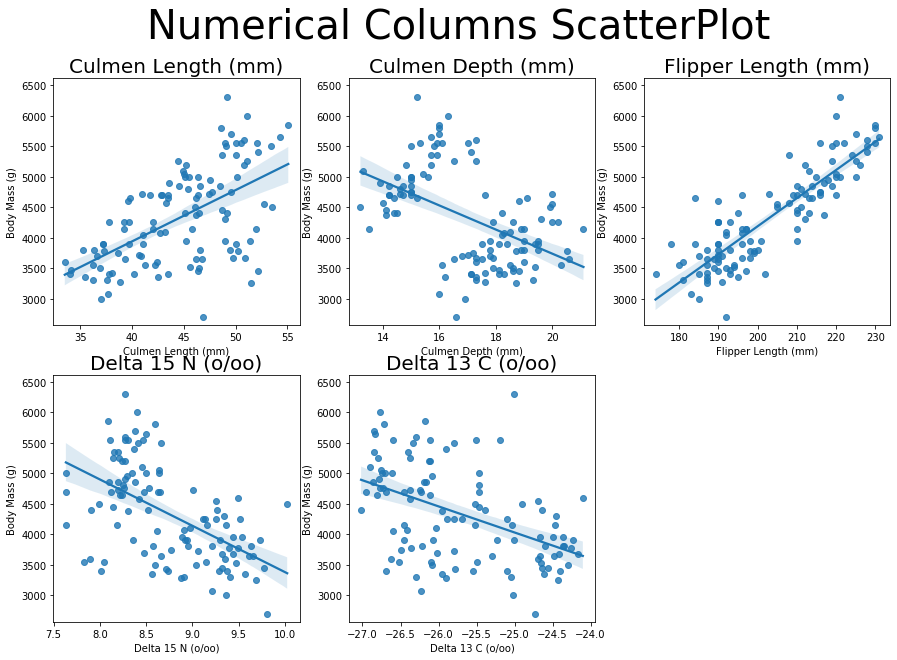

In [11]:
plt.figure(figsize=(15, 10))
plt.suptitle("Numerical Columns ScatterPlot", fontsize=40)
for i in range(len(numerical_columns)):
    plt.subplot(2,3,i+1)
    plt.ylim(train['Body Mass (g)'].min()*0.95, train['Body Mass (g)'].max()*1.05)
    plt.title(numerical_columns[i], fontsize=20)
    sns.regplot(x=train[numerical_columns[i]], y=train['Body Mass (g)'])

ScatterPlot을 살펴보면 Flipper Length가 가장 크게 펭귄 무게에 영향을 주고 있음을 알 수 있다.

그러나 Culmen Depth, Flipper Length를 보면 데이터가 뭉쳐 있는 것이 눈으로 보인다.

이를 통해 범주형 변수가 Culmen Depth, Flipper Length에 영향을 주고 있을 수 있다 의심할 수 있다.

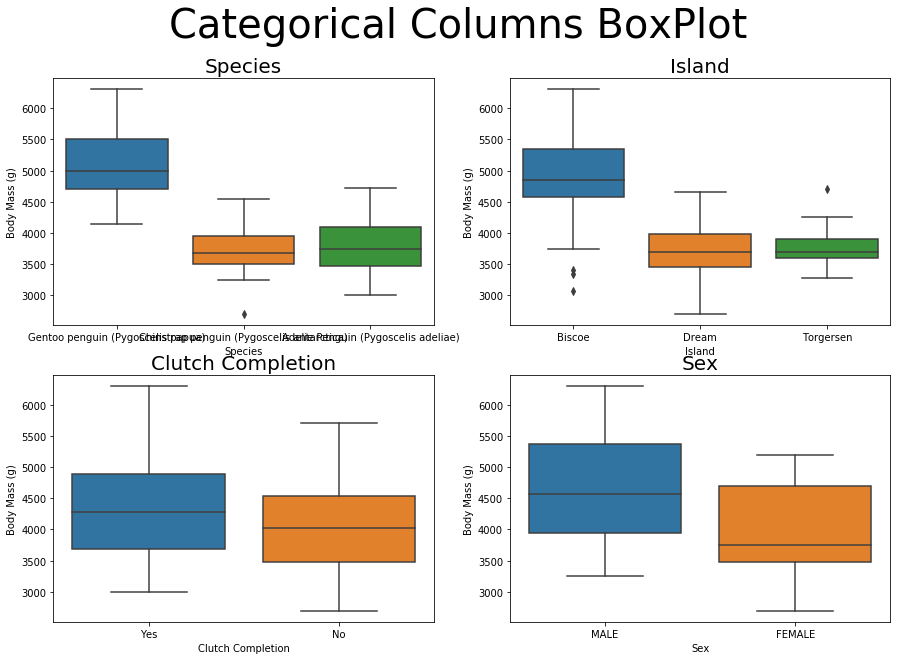

In [10]:
plt.figure(figsize=(15, 10))
plt.suptitle("Categorical Columns BoxPlot", fontsize=40)
for i in range(len(categorical_columns)):
    plt.subplot(2,2,i+1)
    plt.title(categorical_columns[i], fontsize=20)
    sns.boxplot(x=train[categorical_columns[i]], y=train['Body Mass (g)'])
plt.show()

### pairplot을 각 범주형변수와 같이 살펴보기

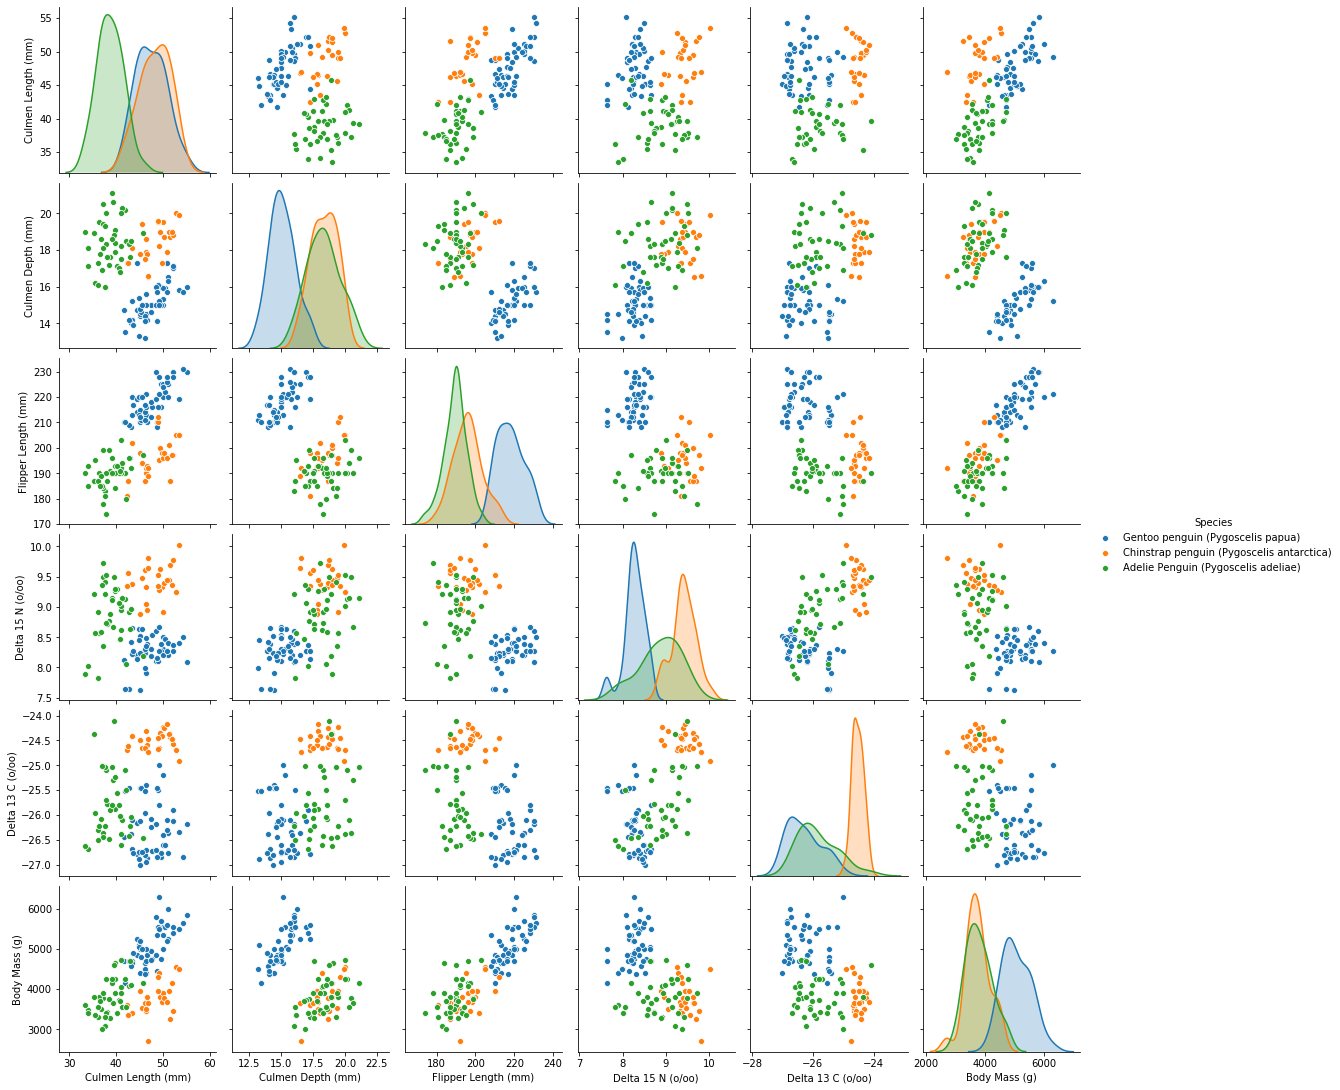

In [13]:
sns.pairplot(train, hue = 'Species')

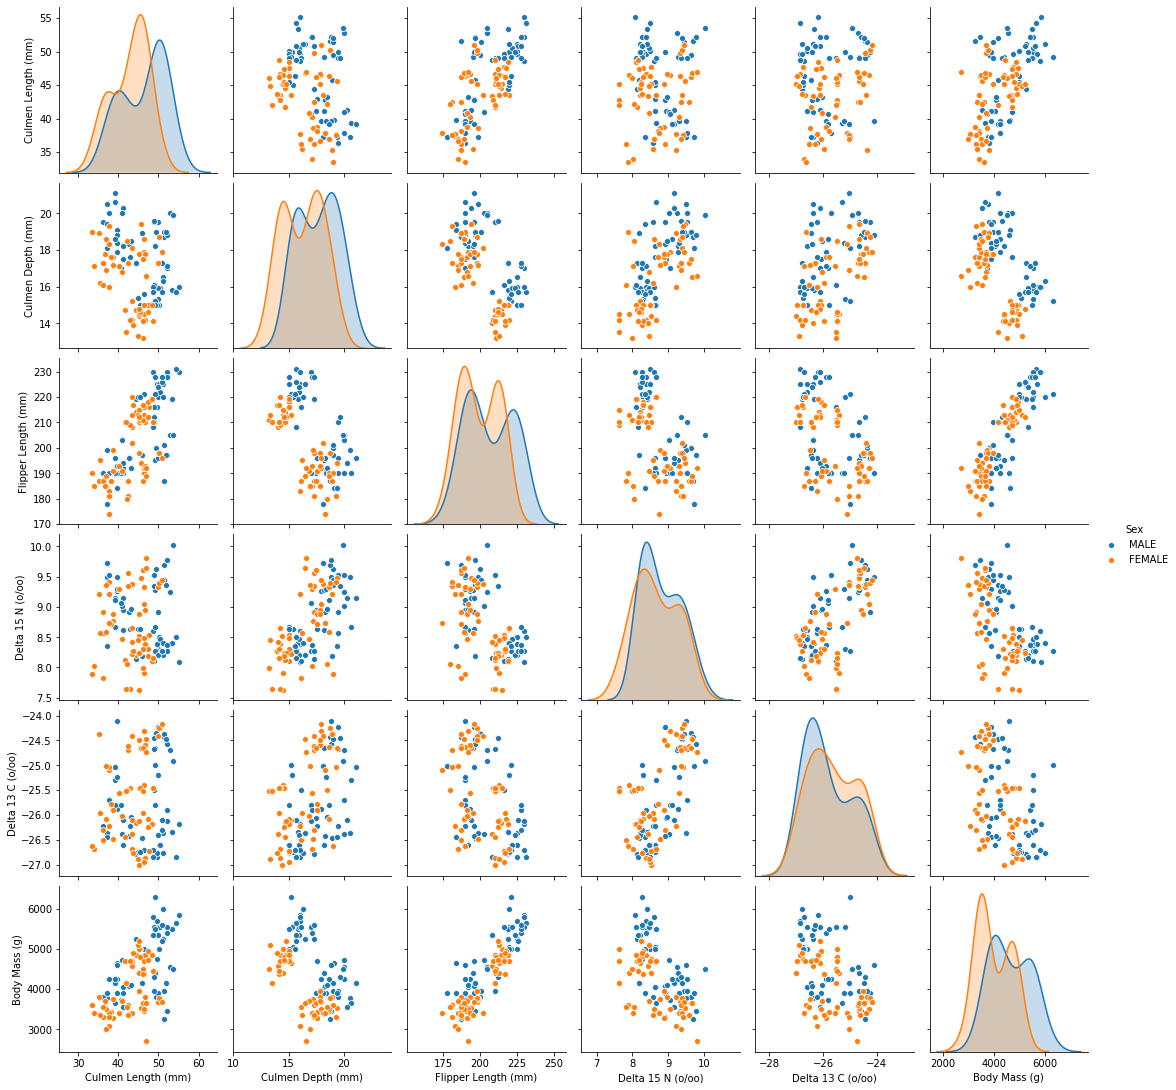

In [14]:
sns.pairplot(train, hue = 'Sex')

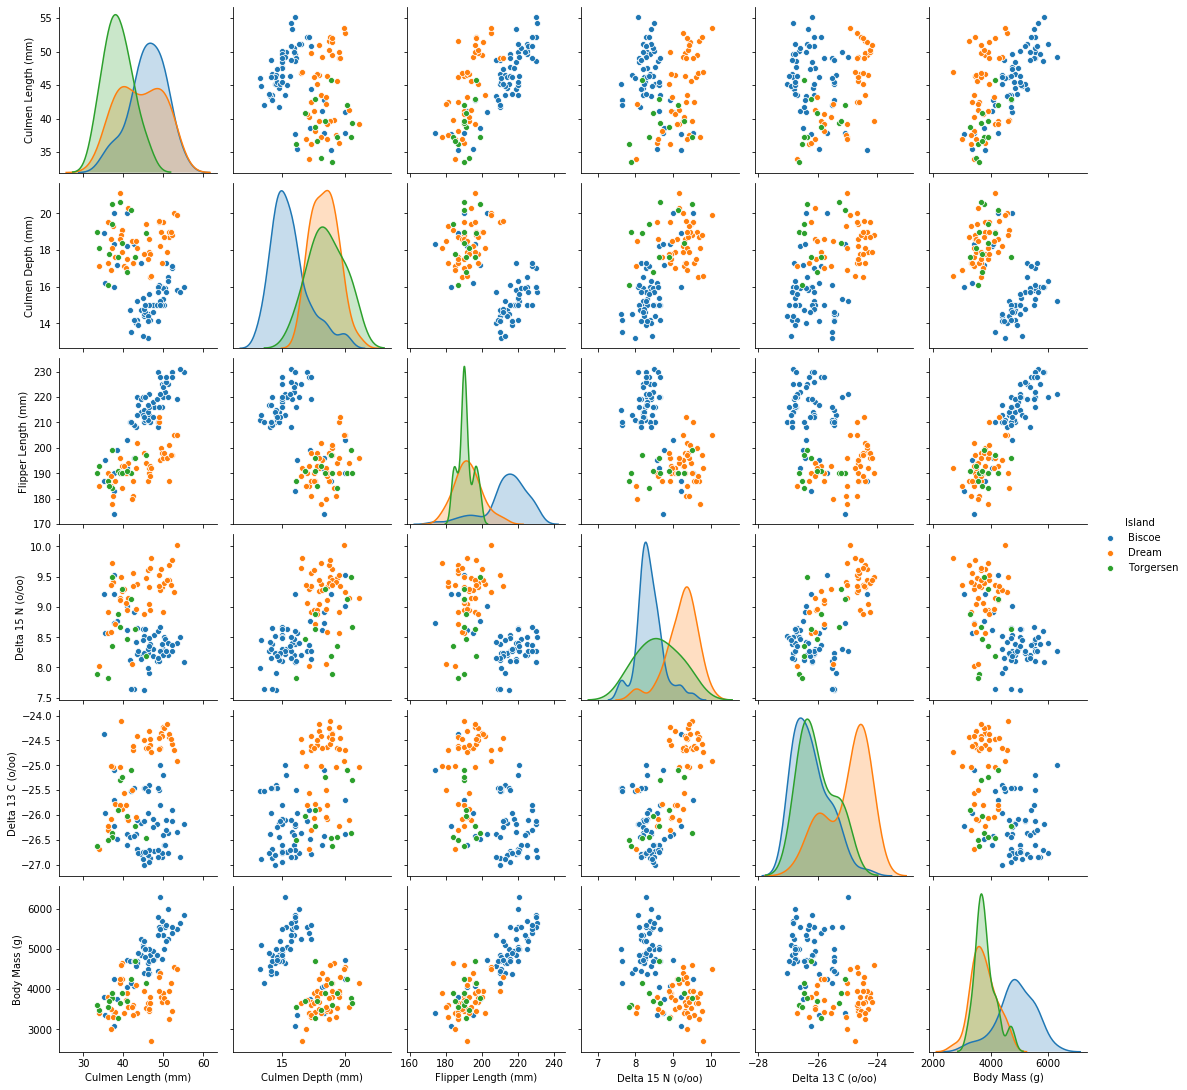

In [15]:
sns.pairplot(train, hue = 'Island')

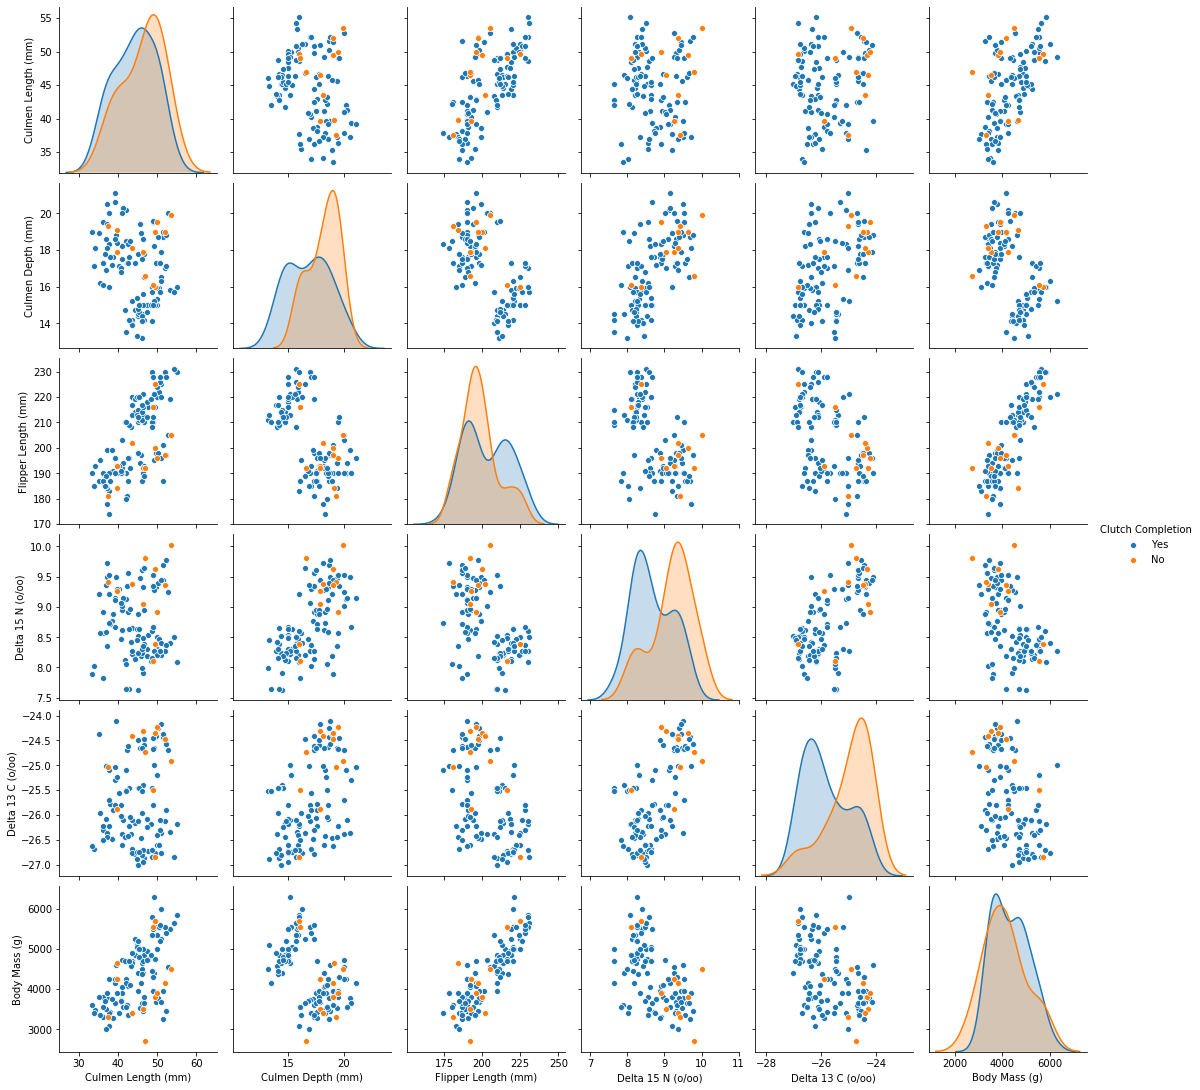

In [16]:
sns.pairplot(train, hue = 'Clutch Completion')

In [17]:
print('펭귄이 사는 섬:',train.Island.unique(),'\n')
print('펭귄 종류:',train.Species.unique())

펭귄이 사는 섬: ['Biscoe' 'Dream' 'Torgersen'] 

펭귄 종류: ['Gentoo penguin (Pygoscelis papua)'
 'Chinstrap penguin (Pygoscelis antarctica)'
 'Adelie Penguin (Pygoscelis adeliae)']


In [18]:
train.groupby(['Island','Species'])[['Body Mass (g)']].mean()

Body Mass (g)
Island    Species                                                 
Biscoe    Adelie Penguin (Pygoscelis adeliae)          3830.555556
          Gentoo penguin (Pygoscelis papua)            5075.520833
Dream     Adelie Penguin (Pygoscelis adeliae)          3776.315789
          Chinstrap penguin (Pygoscelis antarctica)    3756.000000
Torgersen Adelie Penguin (Pygoscelis adeliae)          3817.307692

In [19]:
train.groupby(['Island','Species']).size()

Island     Species                                  
Biscoe     Adelie Penguin (Pygoscelis adeliae)           9
           Gentoo penguin (Pygoscelis papua)            48
Dream      Adelie Penguin (Pygoscelis adeliae)          19
           Chinstrap penguin (Pygoscelis antarctica)    25
Torgersen  Adelie Penguin (Pygoscelis adeliae)          13
dtype: int64

In [20]:
train.columns

Index(['Species', 'Island', 'Clutch Completion', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Sex', 'Delta 15 N (o/oo)',
       'Delta 13 C (o/oo)', 'Body Mass (g)'],
      dtype='object')

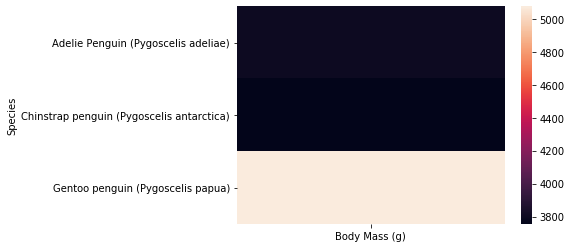

In [21]:
sns.heatmap(train[['Species', 'Body Mass (g)']].groupby('Species').mean())

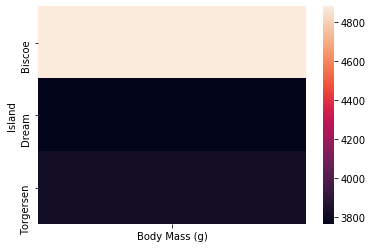

In [22]:
sns.heatmap(train[['Island', 'Body Mass (g)']].groupby('Island').mean())

## 결론
- Flipper Length (mm)가 mass에 가장 뚜렷한 영향을 주고 있음을 알 수 있었다.
- 하지만 데이터가 뭉쳐있는 꼴이여서 살펴보니 Species, Sex, Island 이 세 가지 변수가 mass에 큰 영향을 주고 있음을 알 수 있었다.
- 뿐만 아니라 Species, Island는 mass외에 다른 변수에도 큰 영향을 준다.

### Species, Island의 분포가 비슷해 두 관계를 살펴본 결과
1. Biscoe에 살고 있는 펭귄은 Adelie Penguin, Gentoo penguin 두 종류로 대부분이 Gentoo penguin펭귄이였다.
2. Dream에 살고 있는 펭귄은 Adelie Penguin,Chinstrap penguin 두 종류로 각 19, 25마리로 Chinstrap penguin가 좀 더 많이 살고 있다.
3. Torgersen은 위 두 섬과 달리 오직 Adelie Penguin만 살고 있다.

-> 오직 Bisoe에서만 사는 Gentoo penguin은 Flipper, Culmen가 길고 Culmen이 짧은 펭귄으로 다른 종류의 펭귄에 비해 두드러지게 무겁다.